In [1162]:
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [1163]:

# Download latest version
path = kagglehub.dataset_download("yasserh/breast-cancer-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ziadn\.cache\kagglehub\datasets\yasserh\breast-cancer-dataset\versions\1


In [1164]:
# Construct the full path to the CSV file
csv_path = f"{path}/breast-cancer.csv"

print("Path to dataset:", csv_path)

Path to dataset: C:\Users\ziadn\.cache\kagglehub\datasets\yasserh\breast-cancer-dataset\versions\1/breast-cancer.csv


In [1165]:
# import libs will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier


from xgboost import XGBClassifier




In [1166]:

# Set pandas options to show all columns
pd.set_option("display.max_columns", None)

# Load and display dataset
data = pd.read_csv(r"C:\Users\ziadn\.cache\kagglehub\datasets\yasserh\breast-cancer-dataset\versions\1\breast-cancer.csv")
# print all columns of data
data.head()




,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [1167]:

## Identify and calculate columns that  are highly correlated

# Ensure only numeric columns are used
numeric_df = data.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Convert to a stacked format, reset index, and sort
mask = np.tril(np.ones(corr_matrix.shape), k=0).astype(bool)  # Lower triangle mask
corr_pairs = corr_matrix.where(~mask).stack().reset_index()
corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Sort by absolute correlation value in descending order
most_correlated = corr_pairs.reindex(corr_pairs['Correlation'].abs().sort_values(ascending=False).index)

# Display the top 20 most correlated feature pairs
print(most_correlated.head(20))


            Feature1             Feature2  Correlation
31       radius_mean       perimeter_mean     0.997855
421     radius_worst      perimeter_worst     0.993708
32       radius_mean            area_mean     0.987357
87    perimeter_mean            area_mean     0.986507
422     radius_worst           area_worst     0.984015
437  perimeter_worst           area_worst     0.977578
276        radius_se         perimeter_se     0.972794
106   perimeter_mean      perimeter_worst     0.970387
49       radius_mean         radius_worst     0.969539
104   perimeter_mean         radius_worst     0.969476
51       radius_mean      perimeter_worst     0.965137
130        area_mean         radius_worst     0.962746
133        area_mean           area_worst     0.959213
132        area_mean      perimeter_worst     0.959120
277        radius_se              area_se     0.951830
107   perimeter_mean           area_worst     0.941550
52       radius_mean           area_worst     0.941082
312     pe

from last cell we understand that area , perimeter and radius are same then we will delete all columns of area and perimeter
and all worst columns same as mean we can deal without there.
ID columns for sure will drop



In [1168]:
# before drop any column drop id column donot related and useless in ML process

data = data.drop(columns="id")

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [1169]:

columns_drop = [


    # Drop all area and perimeter columns
    "perimeter_mean","area_mean",
    "perimeter_se","area_se",
    "perimeter_worst","area_worst",

    # Drop radius_worst as well
    "radius_worst","texture_worst","smoothness_worst",

    # some columns high collerated with other columns
    "concave points_mean","concavity_worst","compactness_mean",

]
data_first_filter = data.drop(columns=columns_drop)
print(data_first_filter.shape)
data_first_filter.head()


(569, 19)


,diagnosis,radius_mean,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,compactness_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.6656,0.2654,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1866,0.1860,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.4245,0.2430,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.8663,0.2575,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.2050,0.1625,0.2364,0.07678


In [1170]:

## Identify and calculate columns that  are highly correlated

# Ensure only numeric columns are used
numeric_df = data_first_filter.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Convert to a stacked format, reset index, and sort
mask = np.tril(np.ones(corr_matrix.shape), k=0).astype(bool)  # Lower triangle mask
corr_pairs = corr_matrix.where(~mask).stack().reset_index()
corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Sort by absolute correlation value in descending order
most_correlated = corr_pairs.reindex(corr_pairs['Correlation'].abs().sort_values(ascending=False).index)

# Display the top 20 most correlated feature pairs
print(most_correlated.head(20))


                   Feature1                 Feature2  Correlation
59           concavity_mean     concave points_worst     0.861323
149       compactness_worst  fractal_dimension_worst     0.810455
120          compactness_se     fractal_dimension_se     0.803269
117          compactness_se             concavity_se     0.801268
147       compactness_worst     concave points_worst     0.801080
125            concavity_se        concave points_se     0.771804
86   fractal_dimension_mean  fractal_dimension_worst     0.767297
58           concavity_mean        compactness_worst     0.754968
14              radius_mean     concave points_worst     0.744214
118          compactness_se        concave points_se     0.744083
127            concavity_se     fractal_dimension_se     0.727372
73            symmetry_mean           symmetry_worst     0.699826
54           concavity_mean             concavity_se     0.691270
82   fractal_dimension_mean     fractal_dimension_se     0.688132
55        

In [1171]:

# Convert 'diagnosis' column to numerical (M = 1, B = 0)
data_first_filter["diagnosis"] = data_first_filter["diagnosis"].map({'M': 1, 'B': 0})


data_first_filter.head()


,diagnosis,radius_mean,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,compactness_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.6656,0.2654,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1866,0.1860,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.4245,0.2430,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.8663,0.2575,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.2050,0.1625,0.2364,0.07678


In [1172]:

# Compute correlations of 'diagnosis_num' with all other numeric columns
corr_with_diagnosis = data_first_filter.corr()["diagnosis"].drop("diagnosis")  # Remove self-correlation

# Sort correlations from least to highest
corr_sorted = corr_with_diagnosis.sort_values()

# Display the correlations
print(corr_sorted)

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
radius_se                  0.567134
compactness_worst          0.590998
concavity_mean             0.696360
radius_mean                0.730029
concave points_worst       0.793566
Name: diagnosis, dtype: float64


In [1173]:
# drop some columns Correlation with dignosis is small
columns_drop =[
    "fractal_dimension_se",
    "concavity_se",
]
data_second_filter = data_first_filter.drop(columns=columns_drop)
print(data_second_filter.shape)
data_second_filter.head()

(569, 17)


,diagnosis,radius_mean,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,compactness_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.01587,0.03003,0.6656,0.2654,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01340,0.01389,0.1866,0.1860,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02058,0.02250,0.4245,0.2430,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.01867,0.05963,0.8663,0.2575,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01885,0.01756,0.2050,0.1625,0.2364,0.07678


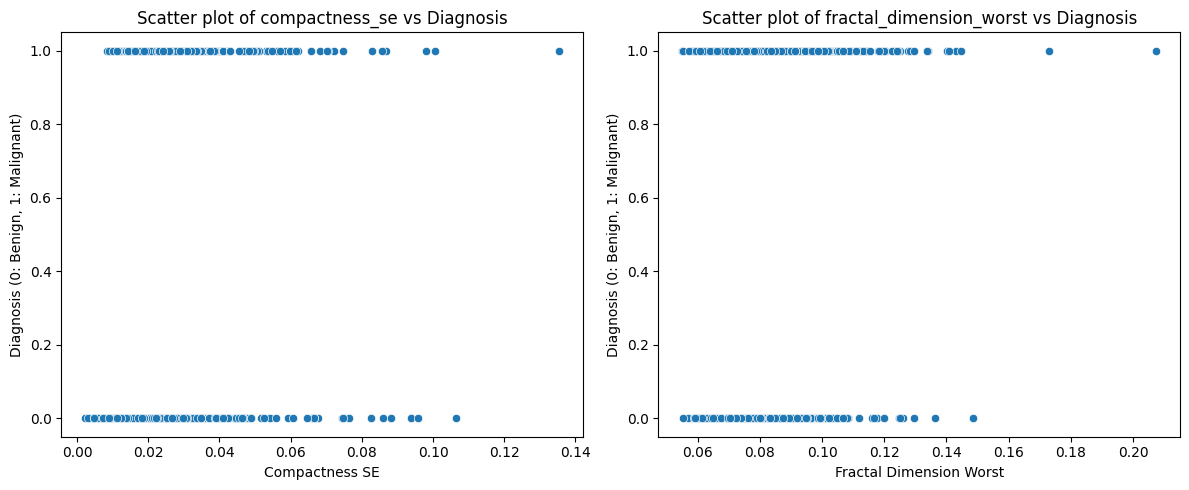

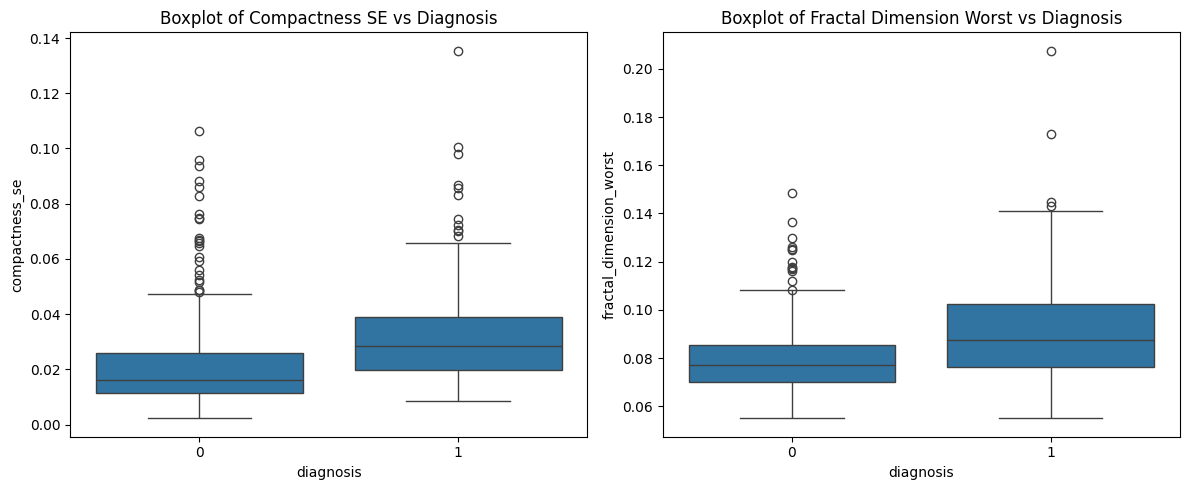

In [1174]:

# Scatter plot for compactness_se vs diagnosis
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # First plot
sns.scatterplot(x='compactness_se', y='diagnosis', data=data_second_filter)
plt.title('Scatter plot of compactness_se vs Diagnosis')
plt.xlabel('Compactness SE')
plt.ylabel('Diagnosis (0: Benign, 1: Malignant)')

# Scatter plot for fractal_dimension_worst vs diagnosis
plt.subplot(1, 2, 2)  # Second plot
sns.scatterplot(x='fractal_dimension_worst', y='diagnosis', data=data_second_filter)
plt.title('Scatter plot of fractal_dimension_worst vs Diagnosis')
plt.xlabel('Fractal Dimension Worst')
plt.ylabel('Diagnosis (0: Benign, 1: Malignant)')

plt.tight_layout()
plt.show()

# Boxplot for both features to show their distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='diagnosis', y='compactness_se', data=data_second_filter)
plt.title('Boxplot of Compactness SE vs Diagnosis')

plt.subplot(1, 2, 2)
sns.boxplot(x='diagnosis', y='fractal_dimension_worst', data=data_second_filter)
plt.title('Boxplot of Fractal Dimension Worst vs Diagnosis')

plt.tight_layout()
plt.show()


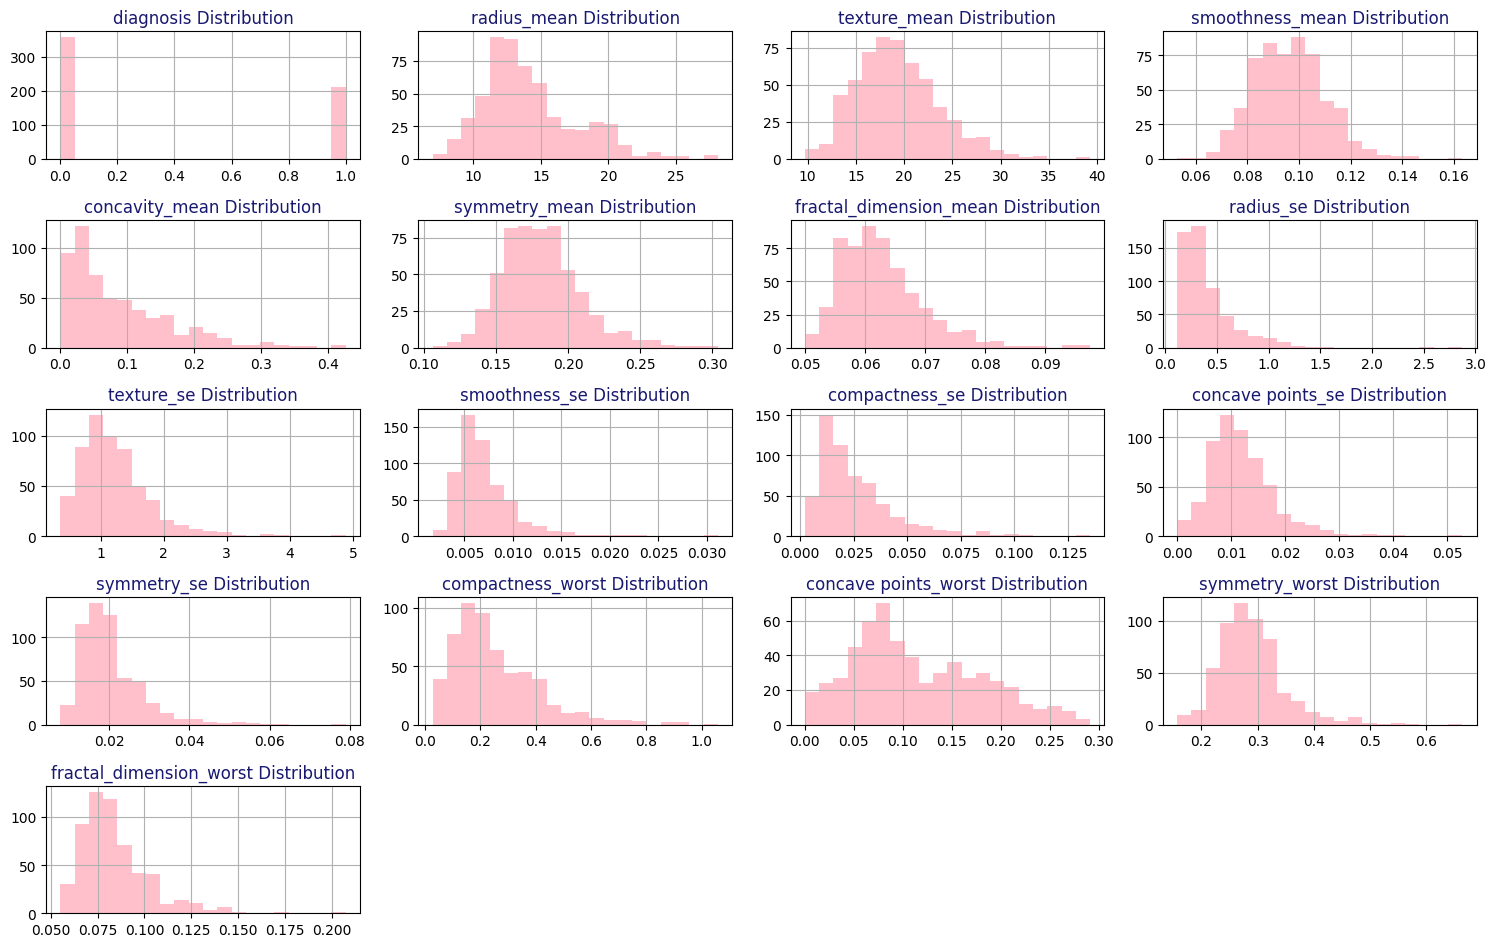

In [1175]:
def draw_histogram(data_second_filter, features, rows, cols):
  fig = plt.figure(figsize=(15,15))
  for i, feature in enumerate(features):
    ax = fig.add_subplot(rows,cols,i+1)
    data_second_filter[feature].hist(bins=20,ax=ax,facecolor='pink') 
    ax.set_title(feature + " Distribution",color='midnightblue')
  fig.tight_layout()
  plt.show()
  print('\n\n')
draw_histogram(data_second_filter,data_second_filter.columns,8,4)

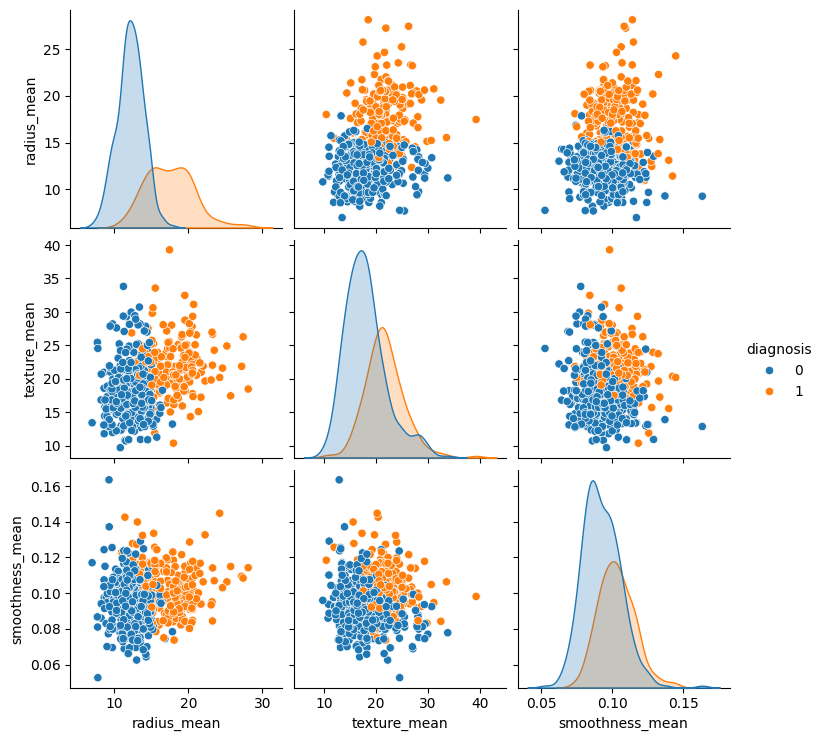

In [1176]:

# pair plot of sample feature
sns.pairplot(data_second_filter, hue = 'diagnosis', 
             vars = ['radius_mean', 'texture_mean', 'smoothness_mean'] )

from last cell we understand that area , perimeter and radius are same then we will delete all columns of area and perimeter
and all worst columns same as mean we can deal without there.
ID columns for sure will drop



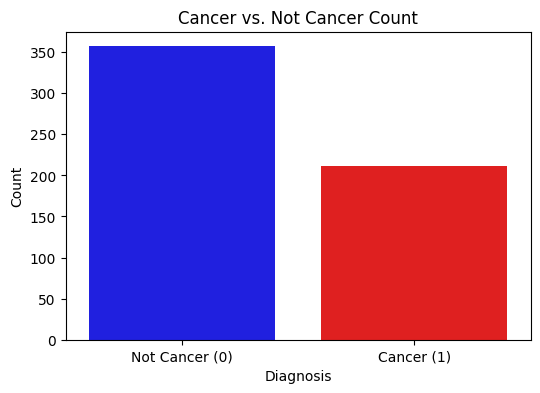

In [1177]:
## know count of cancer or not to know if data biased

# Count the occurrences of each diagnosis type
counts = data_second_filter['diagnosis'].value_counts()

# Plot bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=counts.index, y=counts.values, palette=['blue', 'red'])

# Add labels and title
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.title("Cancer vs. Not Cancer Count")
plt.xticks(ticks=[0, 1], labels=["Not Cancer (0)", "Cancer (1)"])  # Renaming categories
plt.show()


In [1178]:
# show if there is null values in data
data_second_filter.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
smoothness_mean            0
concavity_mean             0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
smoothness_se              0
compactness_se             0
concave points_se          0
symmetry_se                0
compactness_worst          0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [1179]:
# show if have zero values in data exclude diagnosis
(data_second_filter.drop(columns="diagnosis") == 0 ).sum()

radius_mean                 0
texture_mean                0
smoothness_mean             0
concavity_mean             13
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
smoothness_se               0
compactness_se              0
concave points_se          13
symmetry_se                 0
compactness_worst           0
concave points_worst       13
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64

In [1180]:
# Drop rows where any value (except diagnosis) is zero
data_cleaned = data_second_filter[(data_second_filter.drop(columns="diagnosis") != 0).all(axis=1)]

# Display the cleaned data
(data_cleaned.drop(columns="diagnosis") == 0 ).sum()

radius_mean                0
texture_mean               0
smoothness_mean            0
concavity_mean             0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
smoothness_se              0
compactness_se             0
concave points_se          0
symmetry_se                0
compactness_worst          0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [1181]:
print(data_cleaned.shape)
data_cleaned.head()


(556, 17)


,diagnosis,radius_mean,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,compactness_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.01587,0.03003,0.6656,0.2654,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01340,0.01389,0.1866,0.1860,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02058,0.02250,0.4245,0.2430,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.01867,0.05963,0.8663,0.2575,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01885,0.01756,0.2050,0.1625,0.2364,0.07678


In [1182]:

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Make sure we are using the correct shape of data
print(f"Original data shape: {data_cleaned.shape}")  # Should be (556, 17)

# Copy the DataFrame to preserve original data
data_normalized = data_cleaned.copy()

# Select only the columns that need normalization (excluding 'diagnosis')
cols_to_normalize = data_cleaned.columns.difference(['diagnosis'])

# Check if the columns to normalize are correct
print(f"Columns to normalize: {cols_to_normalize}")

# Apply MinMaxScaler to the selected columns
data_normalized[cols_to_normalize] = scaler.fit_transform(data_cleaned[cols_to_normalize])

# Display the first few rows of the normalized data
data_normalized.head()


Original data shape: (556, 17)
Columns to normalize: Index(['compactness_se', 'compactness_worst', 'concave points_se',
       'concave points_worst', 'concavity_mean', 'fractal_dimension_mean',
       'fractal_dimension_worst', 'radius_mean', 'radius_se',
       'smoothness_mean', 'smoothness_se', 'symmetry_mean', 'symmetry_se',
       'symmetry_worst', 'texture_mean', 'texture_se'],
      dtype='object')


,diagnosis,radius_mean,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,compactness_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.504383,0.022658,0.553970,0.702658,0.668446,0.605518,0.356147,0.169930,0.131118,0.351398,0.275197,0.311645,0.616677,0.909293,0.598462,0.418864
1,1,0.630736,0.272574,0.220339,0.202315,0.344367,0.141323,0.156437,0.116497,0.089871,0.081323,0.226707,0.084539,0.148757,0.627960,0.233590,0.222878
2,1,0.587639,0.390260,0.466746,0.461639,0.481580,0.211247,0.229622,0.133020,0.122369,0.283955,0.367663,0.205690,0.381154,0.829925,0.403706,0.213433
3,1,0.182624,0.360839,0.792844,0.564899,0.763481,1.000000,0.139091,0.248083,0.226364,0.543215,0.330166,0.728148,0.812734,0.881302,1.000000,0.773711
4,1,0.617023,0.156578,0.374566,0.463047,0.342766,0.186816,0.233822,0.131274,0.309981,0.167918,0.333700,0.136179,0.166732,0.544694,0.157500,0.142595


In [1183]:
data_final = data_normalized
data_final.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,compactness_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.504383,0.022658,0.553970,0.702658,0.668446,0.605518,0.356147,0.169930,0.131118,0.351398,0.275197,0.311645,0.616677,0.909293,0.598462,0.418864
1,1,0.630736,0.272574,0.220339,0.202315,0.344367,0.141323,0.156437,0.116497,0.089871,0.081323,0.226707,0.084539,0.148757,0.627960,0.233590,0.222878
2,1,0.587639,0.390260,0.466746,0.461639,0.481580,0.211247,0.229622,0.133020,0.122369,0.283955,0.367663,0.205690,0.381154,0.829925,0.403706,0.213433
3,1,0.182624,0.360839,0.792844,0.564899,0.763481,1.000000,0.139091,0.248083,0.226364,0.543215,0.330166,0.728148,0.812734,0.881302,1.000000,0.773711
4,1,0.617023,0.156578,0.374566,0.463047,0.342766,0.186816,0.233822,0.131274,0.309981,0.167918,0.333700,0.136179,0.166732,0.544694,0.157500,0.142595


Logistic Regression Accuracy:  99.107%


<Figure size 600x600 with 0 Axes>

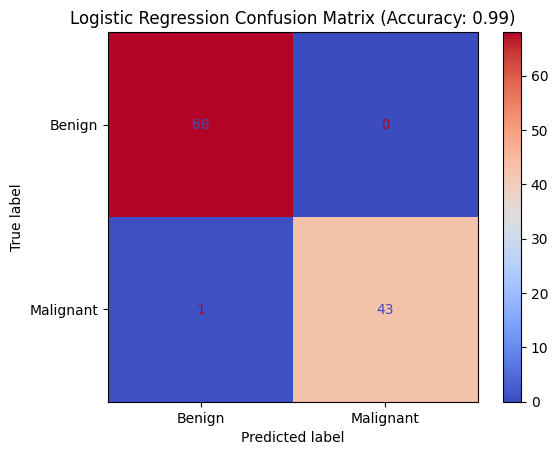

In [1184]:

# Prepare the data
X = data_final.drop(columns='diagnosis')  # Features
y = data_final['diagnosis']  # Target (0: Benign, 1: Malignant)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000 ,C=1.2)
# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Logistic Regression Accuracy: {accuracy *100: .3f}%")
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the advanced confusion matrix with custom colors
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Benign", "Malignant"])

# Plotting the confusion matrix
plt.figure(figsize=(6, 6))
disp.plot(cmap="coolwarm", values_format='d')  # coolwarm colormap for red-blue
plt.title(f"Logistic Regression Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.show()



KNN Accuracy:  98.214%


<Figure size 600x600 with 0 Axes>

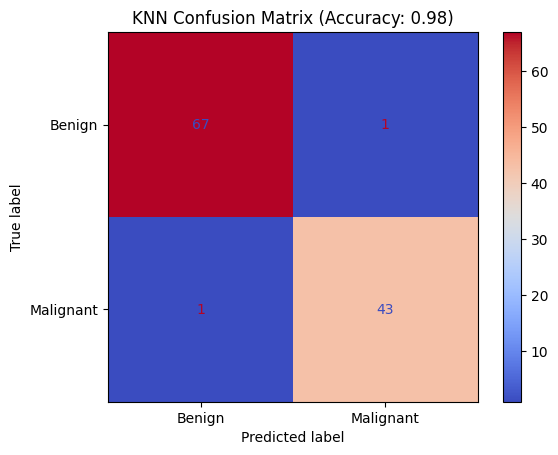

In [1185]:

# Initialize the K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=17)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"KNN Accuracy: {accuracy *100: .3f}%")


# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the advanced confusion matrix with custom colors
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Benign", "Malignant"])

# Plotting the confusion matrix
plt.figure(figsize=(6, 6))
disp.plot(cmap="coolwarm", values_format='d')  # coolwarm colormap for red-blue
plt.title(f"KNN Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.show()


SGD Classifier Accuracy:  99.107%


<Figure size 600x600 with 0 Axes>

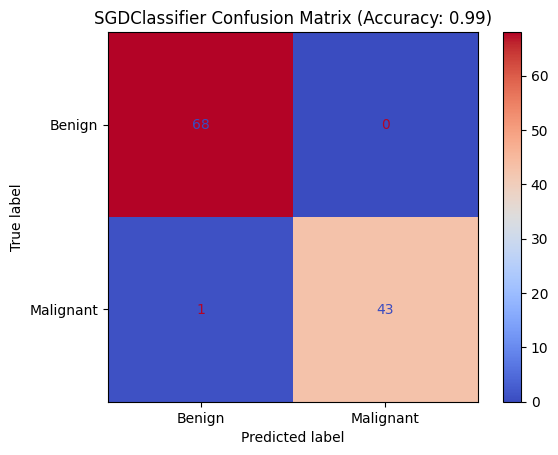

In [1186]:

# Initialize the SGDClassifier with logistic loss
svm_clf = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.08, max_iter=1000, random_state=40)

# Train the model
svm_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_clf.predict(X_test)

# Evaluate the model (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"SGD Classifier Accuracy: {accuracy *100: .3f}%")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the advanced confusion matrix with custom colors
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Benign", "Malignant"])

# Plotting the confusion matrix
plt.figure(figsize=(6, 6))
disp.plot(cmap="coolwarm", values_format='d')  # coolwarm colormap for red-blue
plt.title(f"SGDClassifier Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.show()


RandomForestClassifier Accuracy:  98.214%


<Figure size 600x600 with 0 Axes>

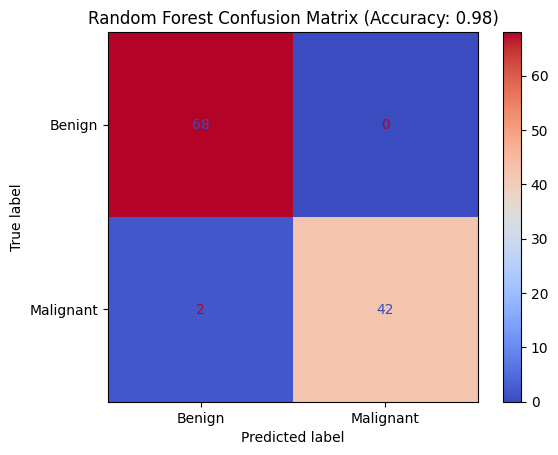

In [1187]:

# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=40, min_samples_leaf=2 ,max_features=0.1) 

# Train the model
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"RandomForestClassifier Accuracy: {accuracy *100: .3f}%")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the advanced confusion matrix with custom colors
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Benign", "Malignant"])

# Plotting the confusion matrix
plt.figure(figsize=(6, 6))
disp.plot(cmap="coolwarm", values_format='d')  # coolwarm colormap for red-blue
plt.title(f"Random Forest Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.show()

XGBoost Accuracy: 99.107%


<Figure size 600x600 with 0 Axes>

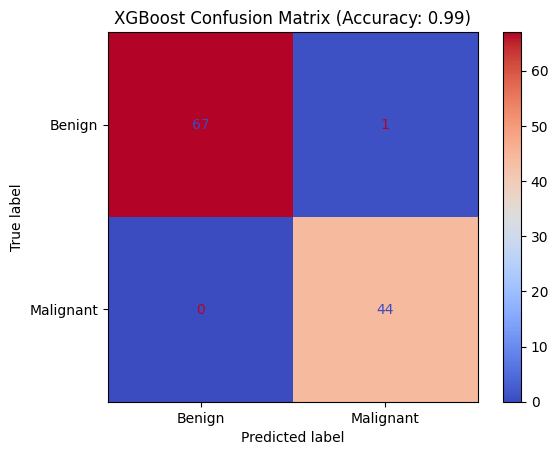

In [1188]:

# Initialize XGBoost classifier with optimized parameters
xgb_clf = XGBClassifier(
    n_estimators=1000,      # Number of trees (default = 100)
    max_depth=5,           # Maximum depth of each tree
    learning_rate=1.3,     # Step size shrinkage (default = 0.1)
    colsample_bytree=0.05,  # Fraction of features used per tree
    random_state=40,       # Ensures reproducibility
    eval_metric="logloss"
)

# Train the model
xgb_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_clf.predict(X_test)

# Evaluate the model (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy *100:.3f}%")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Benign", "Malignant"])

# Plot confusion matrix
plt.figure(figsize=(6, 6))
disp.plot(cmap="coolwarm", values_format='d')  # coolwarm colormap for red-blue
plt.title(f"XGBoost Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.show()
